## Regressão Polinomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def best_poly(x, y, k=1):
    n = len(x)
    A = np.zeros((k + 1, k + 1), dtype=float)
    B = []
    somas = {i: sum(xi**i for xi in x) for i in range(1, 2 * k + 1)}
    for i in range(k + 1):
        for j in range(k + 1):
            if i == 0 and j == 0:
                A[0][0] = n
            else:
                A[i][j] = somas[i + j]
        if i == 0:
            B.append(sum(y))
        else:
            B.append(sum(yi * xi ** i for xi, yi in zip(x, y)))
    return np.linalg.solve(A, B)

## Criando Modelos de Exemplos

In [40]:
def model(x):
    a, b = -2, 2
    erro = a + (b - a) * np.random.random()
    A, B, C, D = 0.36, 1.52, -2.123, 4.123
    return A * x ** 3 + B * x ** 2 + C * x + D + erro

In [60]:
x = np.linspace(-6, 3, 200)
y = [model(xi) for xi in x]

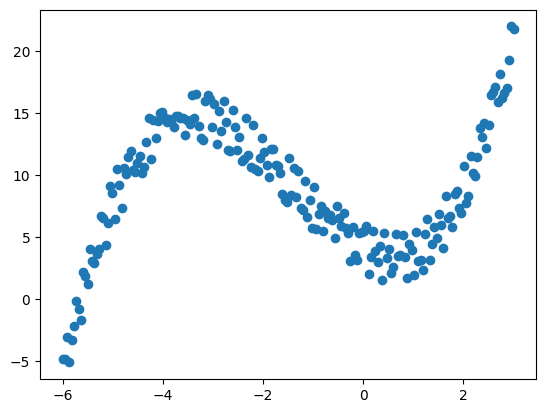

In [61]:
plt.scatter(x, y)

In [62]:
coeffs = best_poly(x, y, k=3)

In [63]:
coeffs

array([ 4.17750931, -2.07146967,  1.51264527,  0.35604197])

In [64]:
def build_best_poly(coeffs):
    def poly(x):
        soma = coeffs[0]
        for i, ai in enumerate(coeffs[1:], 1):
            soma += ai * x ** i
        return soma
    return poly

In [65]:
p = build_best_poly(coeffs)

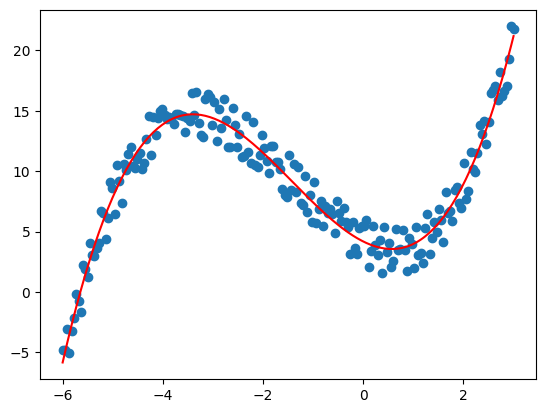

In [66]:
t = np.linspace(min(x), max(x), 200)
pt = [p(ti) for ti in t]
plt.scatter(x, y)
plt.plot(t, pt, color='red')

# Regressão Exponencial

In [67]:
def best_exp(x, y):
    Y = [np.log(yi) for yi in y]
    a0, a1 = best_poly(x, Y, k=1)
    return np.exp(a0), a1

In [78]:
def model_exp(x):
    a, b = 0, 2
    erro = a + (b - a) * np.random.random()
    return 1.24123 * np.exp(1.023424 * x) + erro

In [79]:
x = np.linspace(0, 3, 100)
y = [model_exp(xi) for xi in x]
a, b = best_exp(x, y)
e = lambda x: a * np.exp(b * x)

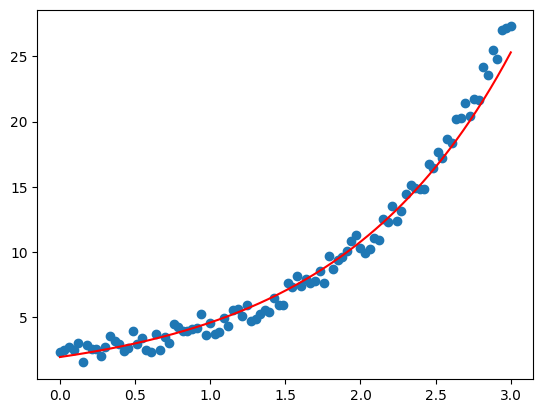

In [81]:
plt.scatter(x, y)
t = np.linspace(min(x), max(x), 200)
et = e(t)
plt.plot(t, et, color="red")